In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

# Read in the data from the CSV file
CPURAMdata = pd.read_csv('CPURAMdataVM1WithoutMTD.txt')
print(CPURAMdata)

        time  CPUPerc  RAMPerc  RAMAvailable    RAMTotal  BashliteActive
0   13:58:23     19.6     15.1    3148521472  3706695680           False
1   13:58:25     14.6     15.1    3148533760  3706695680           False
2   13:58:27     14.6     15.1    3148533760  3706695680           False
3   13:58:29     14.4     15.1    3148541952  3706695680           False
4   13:58:31     16.7     15.1    3148541952  3706695680           False
..       ...      ...      ...           ...         ...             ...
75  14:00:55     17.3     15.1    3148492800  3706695680           False
76  14:00:57     14.6     15.1    3148500992  3706695680           False
77  14:00:59     14.4     15.1    3148500992  3706695680           False
78  14:01:01     15.5     15.1    3148500992  3706695680           False
79  14:01:03     14.6     15.1    3148509184  3706695680           False

[80 rows x 6 columns]


In [2]:
from datetime import datetime

newTime = []

def getSeconds(timeValue):
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTime = getSeconds(CPURAMdata["time"][0])


for i,timeValue in enumerate(CPURAMdata["time"]):
    timeDif = getSeconds(timeValue) - startTime
    newTime.append(timeDif)
    

The RAM mean with Bashlite not running is: 15.35625
The highest Ram value  is: 19.6
The lowest Ram value  is: 13.4


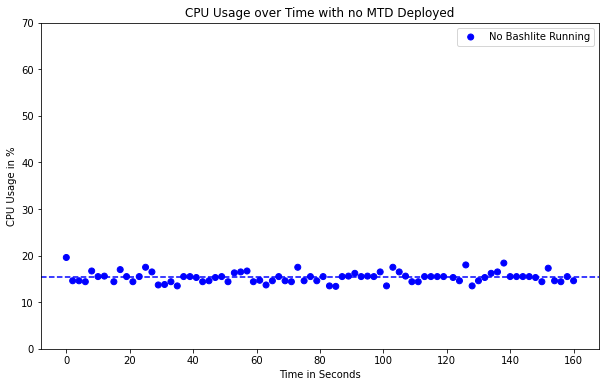

In [3]:
import matplotlib.pyplot as plt

CPURAMdata["time"] = newTime

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(CPURAMdata['time'], CPURAMdata['CPUPerc'], c=['red' if i==True else 'blue' for i in CPURAMdata['BashliteActive']])
bashliteNotRunningMean = CPURAMdata[CPURAMdata['BashliteActive'] == False]['CPUPerc'].mean()


highestValueRAM = 0
lowestValueRAM = 100

for index, row in CPURAMdata.iterrows():
    if row["CPUPerc"] > highestValueRAM:
        highestValueRAM = row["CPUPerc"]
        
    elif row["CPUPerc"] < lowestValueRAM:
        lowestValueRAM = row["CPUPerc"]
    else:
        pass
    
    
    
print(f"The RAM mean with Bashlite not running is: {bashliteNotRunningMean}")
print(f"The highest Ram value  is: {highestValueRAM}")
print(f"The lowest Ram value  is: {lowestValueRAM}")
plt.legend(["No Bashlite Running"])
plt.ylim(0, 70)
ax.axhline(bashliteNotRunningMean, color='b', linestyle='--', label='mean')
plt.title('CPU Usage over Time with no MTD Deployed')
plt.xlabel('Time in Seconds')
plt.ylabel('CPU Usage in %')

plt.show()
